In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score , recall_score
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']=250
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

# Checking Null value

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# data preprocessing

In [6]:
cols = df.columns
alp = [x for x in cols if df[x].dtype == 'O']
alp

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [7]:
label_encoder = LabelEncoder()
df[alp] = df[alp].apply(lambda x: label_encoder.fit_transform(x))
print(df)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


# split data in training and testing part

In [15]:
X = df.drop('y',axis=1)
Y = df['y']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

# model building

In [60]:
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr.fit(xtrain,ytrain)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [61]:
lr.score(xtest,ytest)

0.8877584872276899

In [62]:
ypred = lr.predict(xtest)

# Model Evaluatioin

In [63]:
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


# Classification Report


In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



Text(241.30555555555557, 0.5, 'Predicted Values')

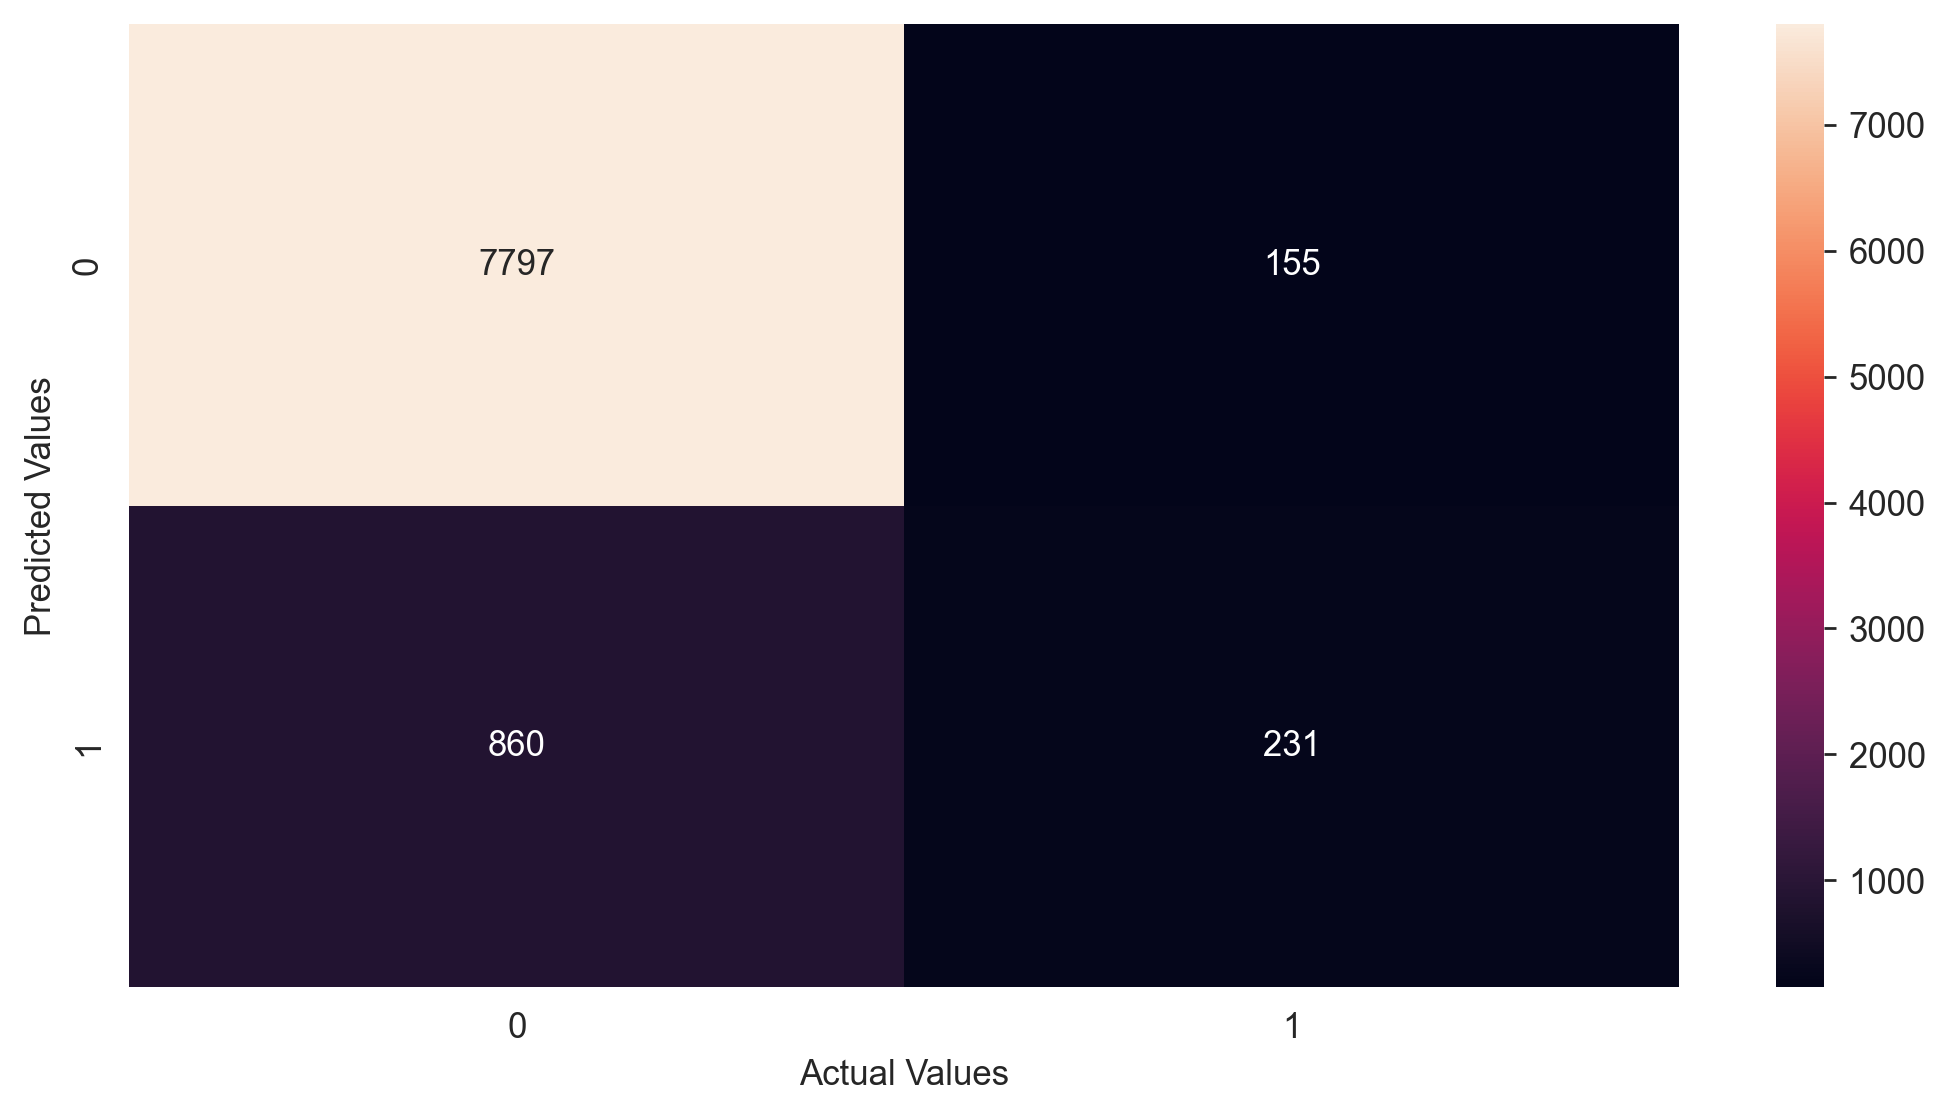

In [65]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,fmt="0")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Threshold Selection

In [66]:
proba = lr.predict_proba(xtest)[:,1]
proba

array([0.01652315, 0.03507997, 0.06505079, ..., 0.01480894, 0.00591954,
       0.03572047])

In [67]:
fpr,tpr,threshold = roc_curve(ytest,proba)
auc = roc_auc_score(ytest,proba)

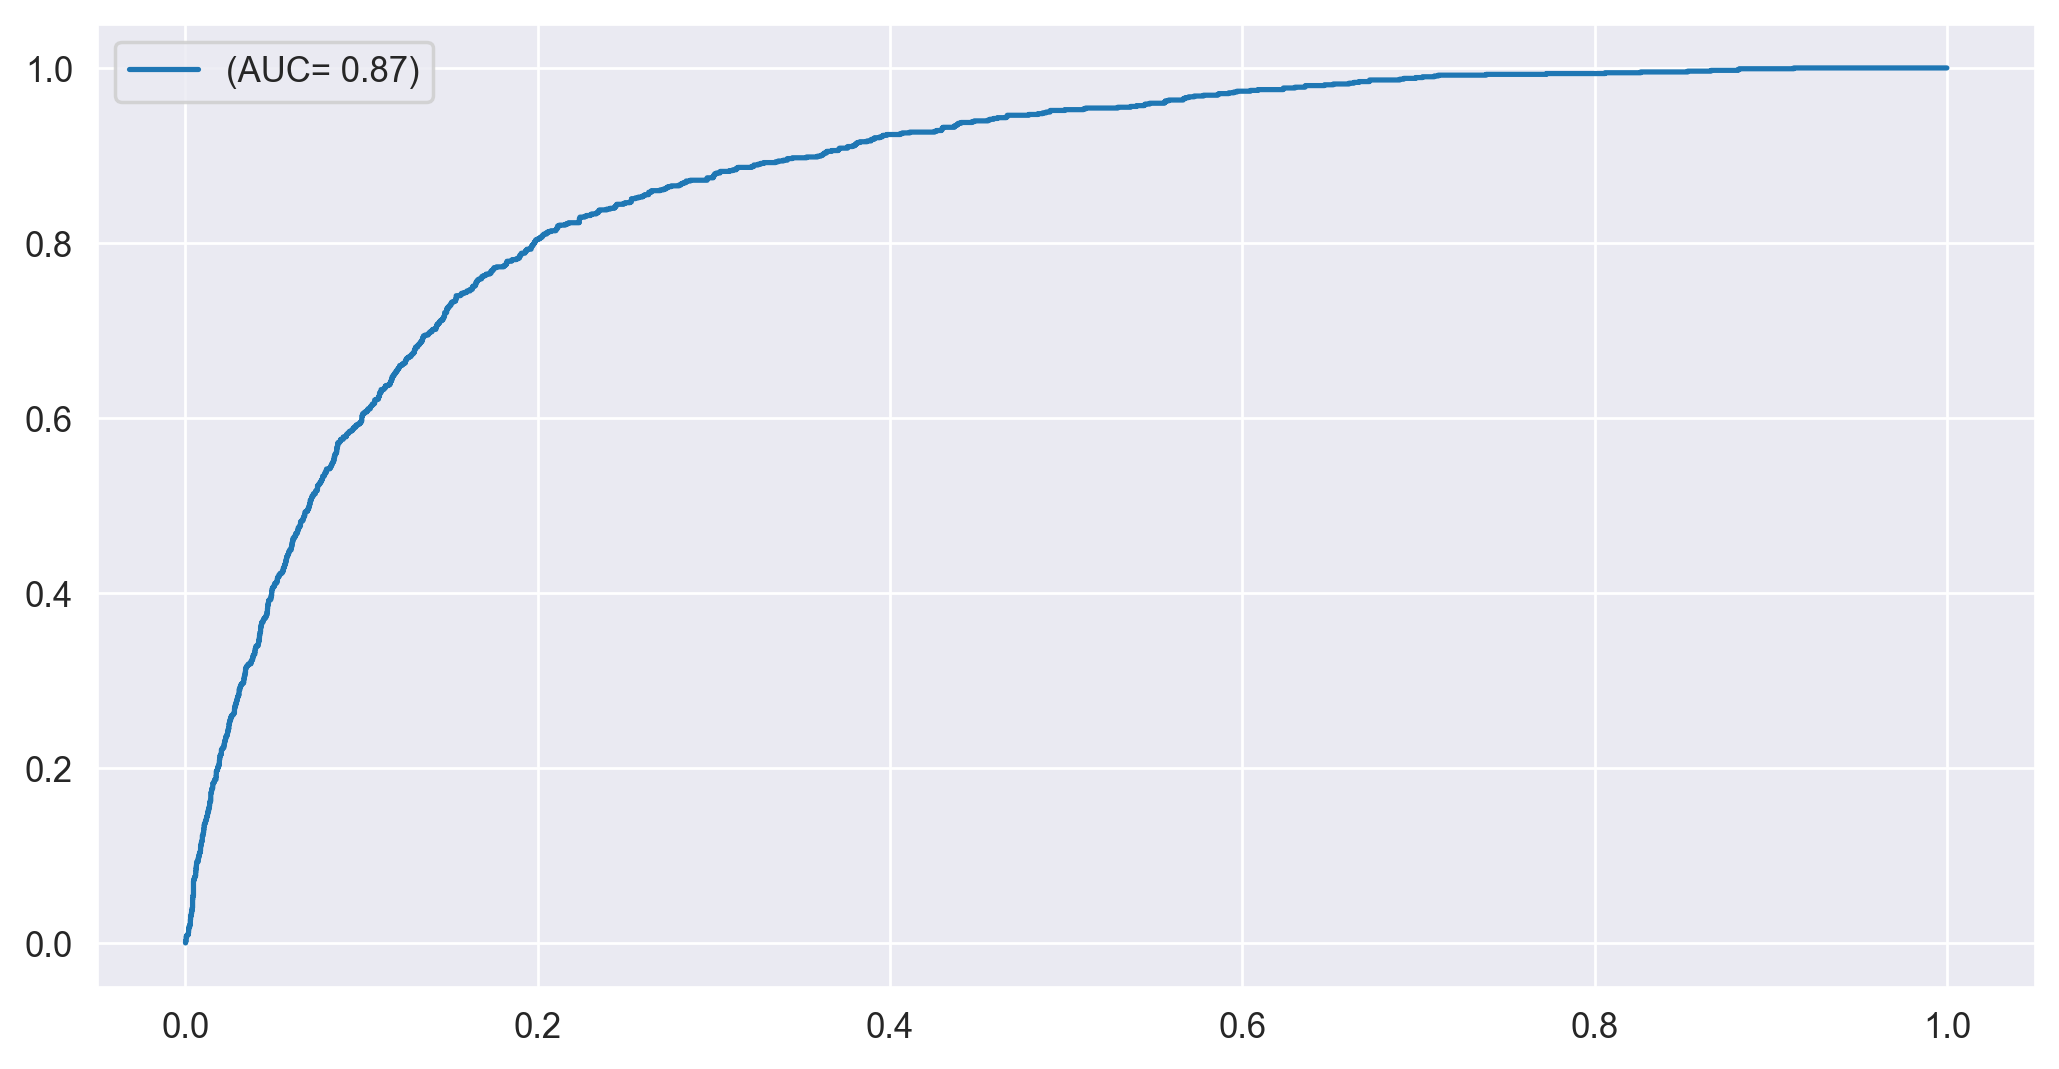

In [68]:
plt.plot(fpr,tpr, label = '(AUC= %0.2f)'%auc)
plt.grid
plt.legend()

# Select best Threshold

In [69]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [70]:
thre_sel = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' :  accuracy
})

In [71]:
thre_sel.sort_values(by='Accuracy', ascending=False)

Threshold  Accuracy
187    0.492223  0.887980
230    0.453581  0.887869
179    0.499315  0.887869
180    0.498579  0.887869
182    0.495730  0.887758
...         ...       ...
1410   0.011874  0.224151
1411   0.011834  0.224041
1412   0.009846  0.197058
1413   0.009843  0.196948
1414   0.000098  0.120756

[1415 rows x 2 columns]

In [79]:
ypred = binarize([proba], threshold=0.451488)[0]

In [80]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.26      0.35      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



<AxesSubplot:>

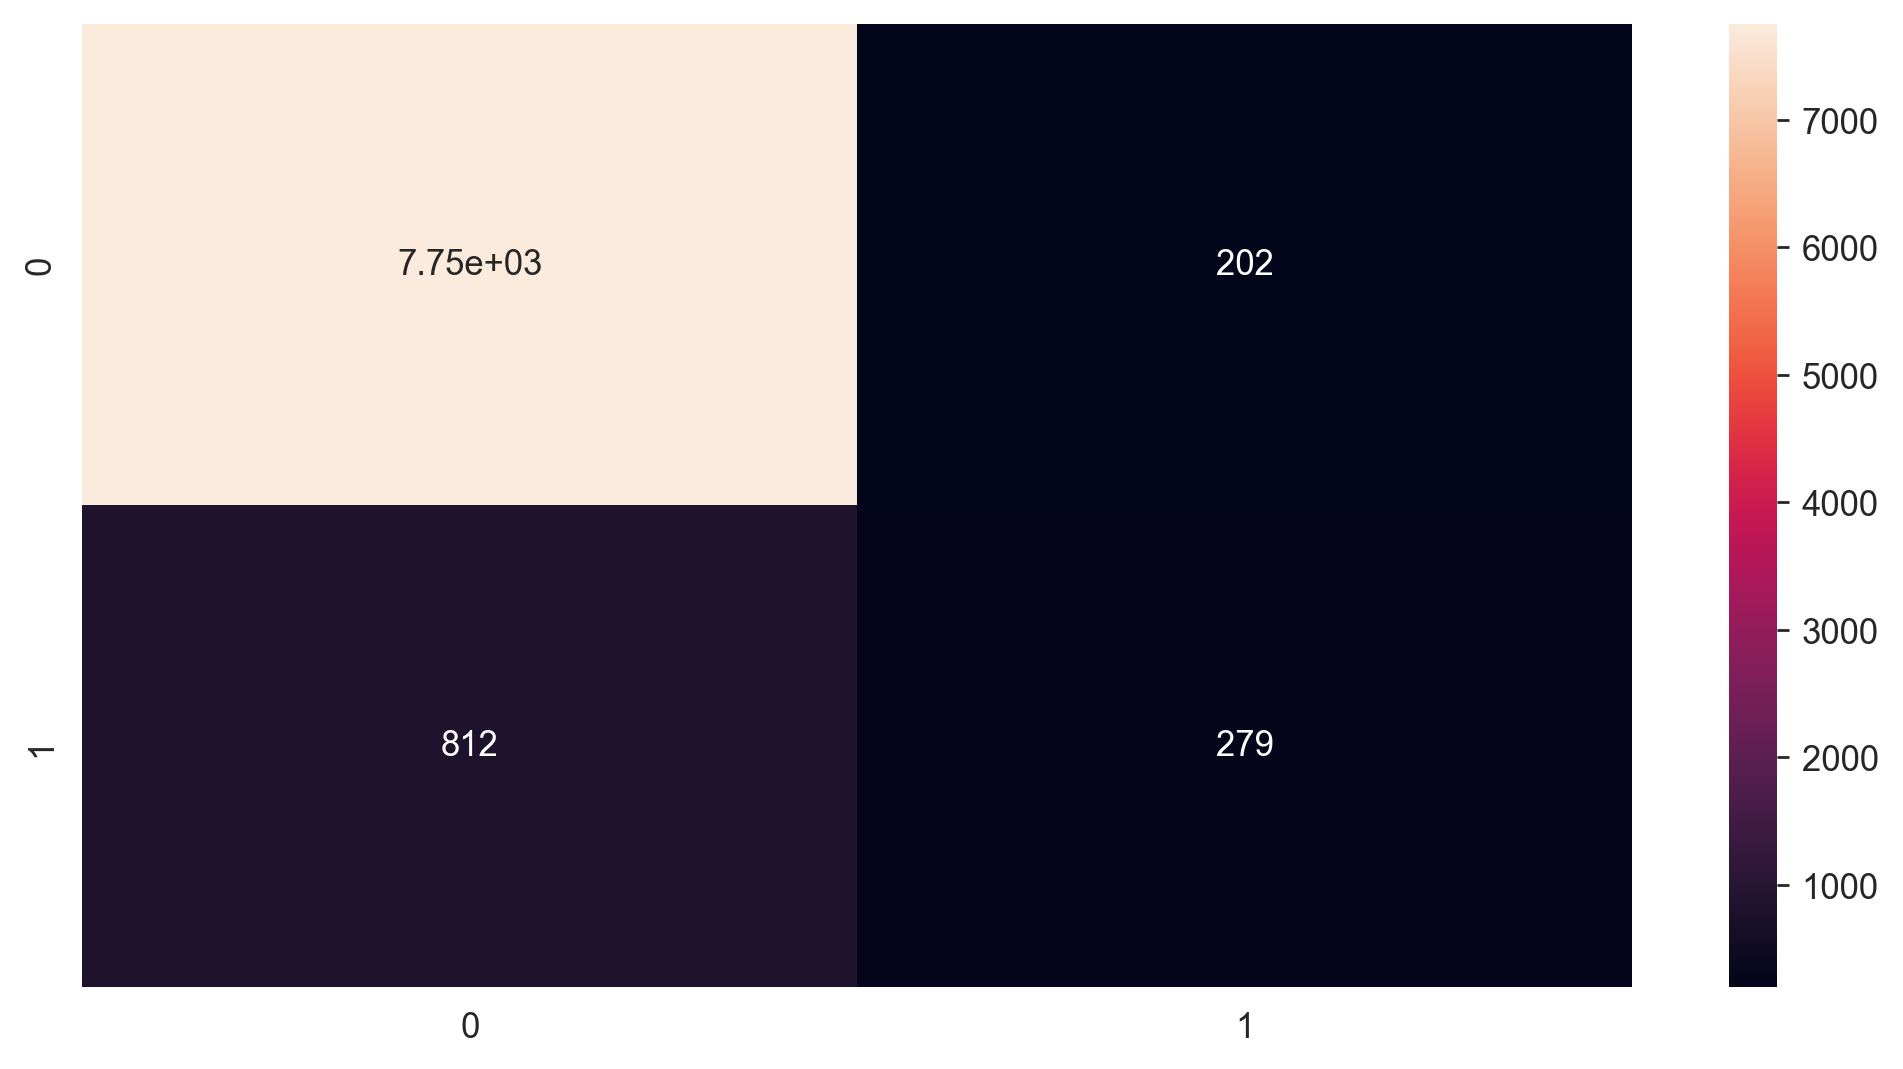

In [81]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.3g')

# Managed to imporve model by 0.02